# Basic Image Processing In Python - Part 1

**Jupyter Notebook Author**: https://innat.github.io/innat.github.io/Image-Processing-in-Python-Part-1/, modified by Michael Coughlin.

This is a Jupyter notebook lesson extending the La Serena Data Science School 2018 and adapted for the NARIT-EACOA 2019 summer workshop.


# Introduction : A Little Bit About Pixel

Computer store images as a mosaic of tiny squares. This is like the ancient art form of tile mosaic, or the melting bead kits kids play with today. Now, if these square tiles are too big, it’s then hard to make smooth edges and curves. The more and smaller tiles we use, the smoother or as we say less pixelated, the image will be. These sometimes get referred to as the resolution of the images.

Vector graphics are a somewhat different method of storing images that aim to avoid pixel related issues. But even vector images, in the end, are displayed as a mosaic of pixels. The word pixel means a picture element. A simple way to describe each pixel is using a combination of three colors, namely Red, Green, Blue. This is what we call an RGB image.

In an RGB image, each pixel is represented by three 8 bit numbers associated with the values for Red, Green, Blue respectively. Eventually using a magnifying glass, if we zoom a picture, we’ll see the picture is made up of tiny dots of little light or more specifically the pixels and what more interesting is to see that those tiny dots of little light are actually multiple tiny dots of little light of different colors which are nothing but Red, Green, Blue channels.

Pixel together from far away, create an image and upfront they’re just little lights that are ON and OFF. The combination of those creates images and basically what we see on the screen every single day.

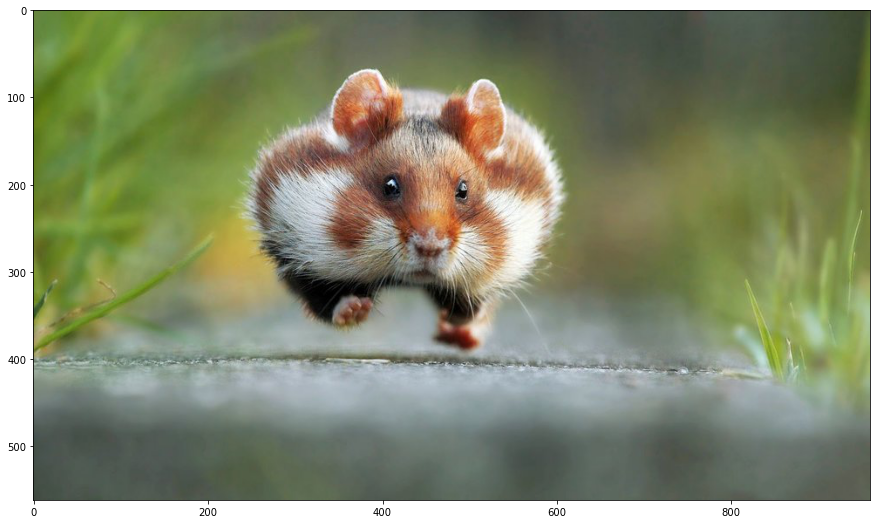

In [4]:
# import libraries
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

if __name__ == '__main__':
    pic = imageio.imread('images/demo_2.jpg')
    plt.figure(figsize = (15,15))
    plt.imshow(pic)

In [6]:
# Observe Basic Properties of Image
print('Type of the image : ' , type(pic))
print()
print('Shape of the image : {}'.format(pic.shape))
print('Image Hight {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

Type of the image :  <class 'imageio.core.util.Array'>

Shape of the image : (562, 960, 3)
Image Hight 562
Image Width 960
Dimension of Image 3
Image size 1618560
Maximum RGB value in this image 255
Minimum RGB value in this image 0


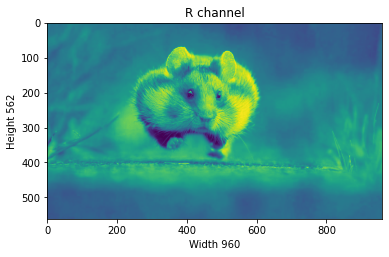

In [7]:
plt.title('R channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 0])
plt.show()

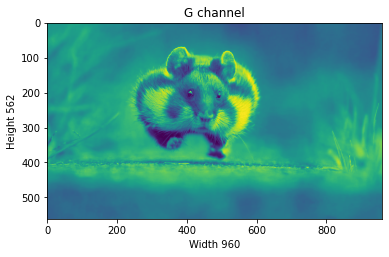

In [8]:
plt.title('G channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 1])
plt.show()

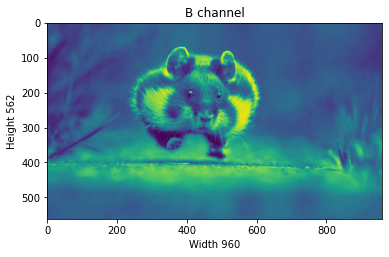

In [9]:
plt.title('B channel')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 2])
plt.show()

Now, here we can also able to change the number of RGB values. As an example, let’s set the Red, Green, Blue layer for following Rows values to full intensity.

R channel: Row- 100 to 110
G channel: Row- 200 to 210
B channel: Row- 300 to 310
We’ll load the image once, so that we can visualize each change simultaneously.

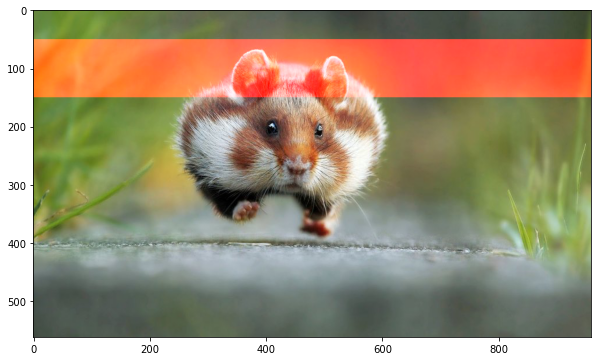

In [11]:
pic = imageio.imread('images/demo_2.jpg')

pic[50:150 , : , 0] = 255 # full intensity to those pixel's R channel
plt.figure( figsize = (10,10))
plt.imshow(pic)
plt.show()

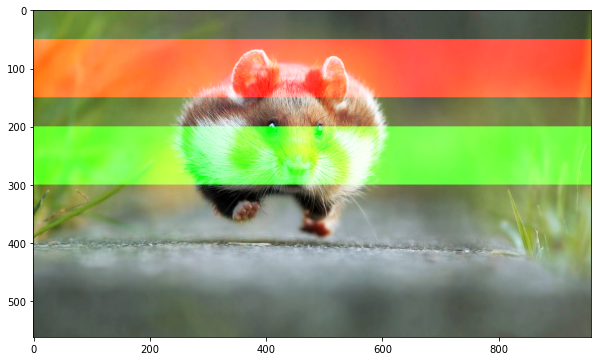

In [12]:
pic[200:300 , : , 1] = 255 # full intensity to those pixel's G channel
plt.figure( figsize = (10,10))
plt.imshow(pic)
plt.show()

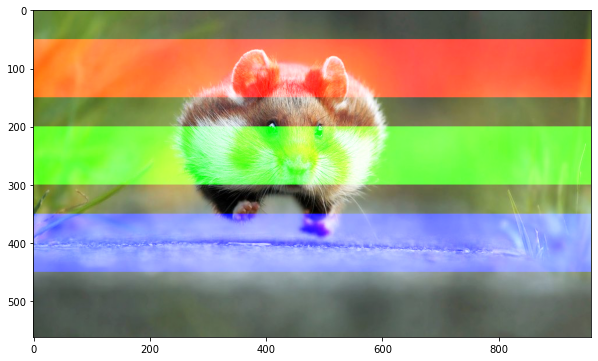

In [13]:
pic[350:450 , : , 2] = 255 # full intensity to those pixel's B channel
plt.figure( figsize = (10,10))
plt.imshow(pic)
plt.show()

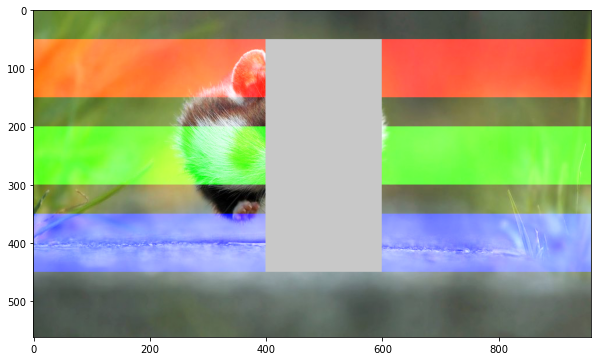

In [14]:
# set value 200 of all channels to those pixels which turns them to white
pic[ 50:450 , 400:600 , [0,1,2] ] = 200 
plt.figure( figsize = (10,10))
plt.imshow(pic)
plt.show()

# Splitting Layers
Now, we know that each pixel of the image is represented by three integers. Splitting the image into separate color components is just a matter of pulling out the correct slice of the image array.

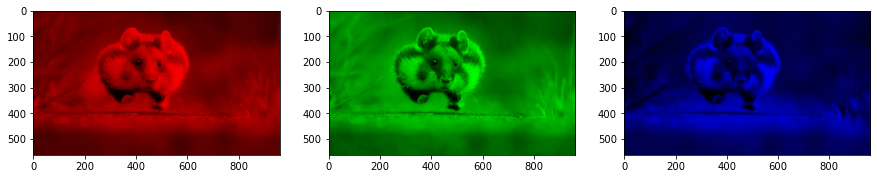

In [16]:
import numpy as np
pic = imageio.imread('images/demo_2.jpg')

fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = pic[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)

# Greyscale

Black and white images are stored in 2-Dimentional arrays. There’re two types of Black and White images:

 - Greyscale : Ranges of shades of grey : 0 ~ 255
 - Binary : Pixel are either black or white : 0 or 255
 
Now, Greyscaling is such process by which an image is converted from a full color to shades of grey. In image processing tools, for example: in OpenCV, many function uses greyscale images before porcessing and this is done because it simplifies the image, acting almost as a noise reduction and increasing processing time as there’s less information in the images.

There are a couple of ways to do this in python to convert image to grayscale. But a straight forward way using matplotlib is to take the weighted mean of the RGB value of original image using this formula.

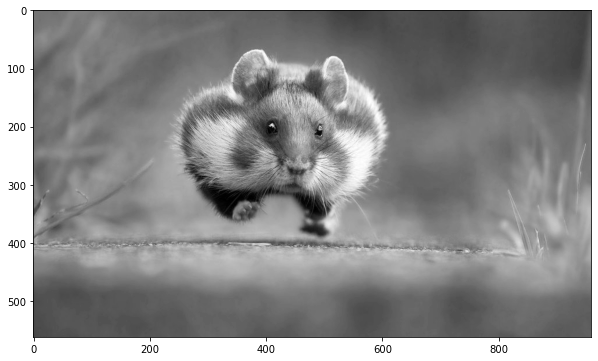

In [20]:
# Y' = 0.299 R + 0.587 G + 0.114 B
pic = imageio.imread('images/demo_2.jpg')

gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gray = gray(pic)  

plt.figure( figsize = (10,10))
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
plt.show()

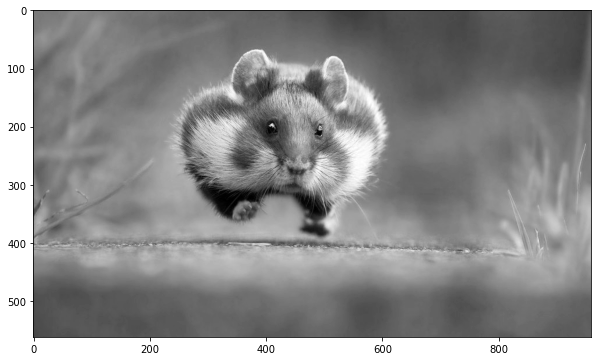

Type of the image :  <class 'imageio.core.util.Array'>

Shape of the image : (562, 960)
Image Hight 562
Image Width 960
Dimension of Image 2

Image size 539520
Maximum RGB value in this image 254.99999999999997
Minimum RGB value in this image 0.0
Random indexes [X,Y] : 129.07


In [22]:
# However, the GIMP converting color to grayscale image software has three algorithms to do the task.

# Lightness The graylevel will be calculated as: Lightness = ½ × (max(R,G,B) + min(R,G,B))

# Luminosity The graylevel will be calculated as: Luminosity = 0.21 × R + 0.72 × G + 0.07 × B

# Average The graylevel will be calculated as: Average = (R + G + B) ÷ 3

# Let’s give a try one of their algorithm, what about Luminosity!

pic = imageio.imread('images/demo_2.jpg')

gray = lambda rgb : np.dot(rgb[... , :3] , [0.21 , 0.72, 0.07]) 
gray = gray(pic)  

plt.figure( figsize = (10,10))
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
plt.show()

'''
Let's take a quick overview some the changed properties now the color image.
Like we observe some properties of color image, same statements are applying 
now for gray scaled image.
'''

print('Type of the image : ' , type(gray))
print()

print('Shape of the image : {}'.format(gray.shape))
print('Image Hight {}'.format(gray.shape[0]))
print('Image Width {}'.format(gray.shape[1]))
print('Dimension of Image {}'.format(gray.ndim))
print()

print('Image size {}'.format(gray.size))
print('Maximum RGB value in this image {}'.format(gray.max()))
print('Minimum RGB value in this image {}'.format(gray.min()))
print('Random indexes [X,Y] : {}'.format(gray[100, 50]))